In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [60]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the dataset from a local CSV file
df = pd.read_csv("heart.csv")

# Display the first few rows
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [47]:
# Keep only selected features and the target
selected_features = ['thalach', 'oldpeak', 'num']
df = df[selected_features].copy()

# Rename the target column for clarity
df.rename(columns={'num': 'target'}, inplace=True)

# Binarize the target: 0 = no heart disease, 1 = has heart disease (any of 1–4)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Drop any rows with missing values
df.dropna(inplace=True)

# Display basic info
print("Class distribution:\n", df['target'].value_counts())
df.head()


Class distribution:
 target
0    164
1    139
Name: count, dtype: int64


,thalach,oldpeak,target
0,150,2.3,0
1,108,1.5,1
2,129,2.6,1
3,187,3.5,0
4,172,1.4,0


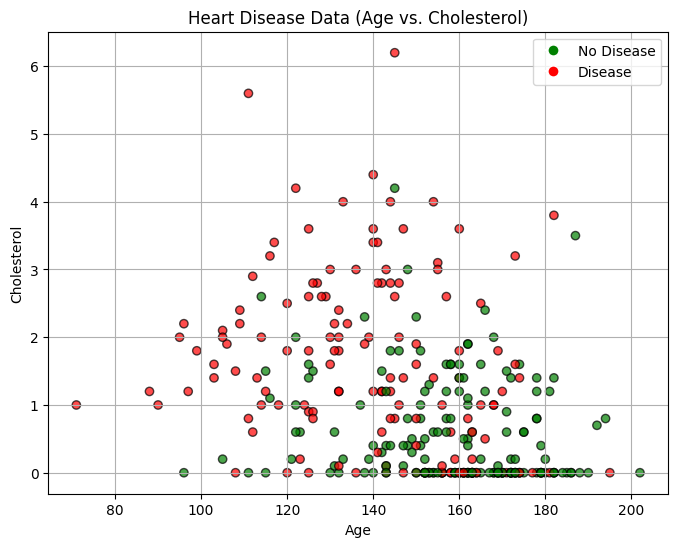

In [48]:
import matplotlib.pyplot as plt

# Scatter plot of data
plt.figure(figsize=(8, 6))
colors = ['green' if label == 0 else 'red' for label in df['target']]

plt.scatter(df['thalach'], df['oldpeak'], c=colors, alpha=0.7, edgecolors='k')
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Heart Disease Data (Age vs. Cholesterol)")
plt.grid(True)
plt.legend(handles=[
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='green', label='No Disease', markersize=8),
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='red', label='Disease', markersize=8)
])
plt.show()


In [49]:
import numpy as np

def perceptron_predict_numpy(X, weights, bias):
    """
    X: 2D NumPy array of shape (n_samples, n_features)
    weights: 1D NumPy array of shape (n_features,)
    bias: scalar value
    Returns: predicted class labels (0 or 1)
    """
    linear_output = np.dot(X, weights) + bias
    predictions = np.where(linear_output >= 0, 1, 0)
    return predictions


In [51]:
import torch

def perceptron_predict_torch(X, weights, bias):
    """
    X: torch tensor of shape (n_samples, n_features)
    weights: torch tensor of shape (n_features,)
    bias: scalar tensor
    Returns: predicted class labels (0 or 1)
    """
    linear_output = torch.matmul(X, weights) + bias
    predictions = (linear_output >= 0).int()  # returns 0 or 1
    return predictions


In [52]:
# Sample input (2 features): [[age, chol]]
sample_np = np.array([[55, 220], [40, 180]])
sample_torch = torch.tensor(sample_np, dtype=torch.float32)

# Dummy weights and bias
w_np = np.array([0.02, -0.01])
b_np = -2

w_torch = torch.tensor(w_np, dtype=torch.float32)
b_torch = torch.tensor(b_np, dtype=torch.float32)

# Predict using both functions
print("NumPy Predictions:", perceptron_predict_numpy(sample_np, w_np, b_np))
print("Torch Predictions:", perceptron_predict_torch(sample_torch, w_torch, b_torch))


NumPy Predictions: [0 0]
Torch Predictions: tensor([0, 0], dtype=torch.int32)


In [53]:
def perceptron_update_numpy(x, y_true, weights, bias, lr=1.0):
    """
    x: 1D numpy array of shape (n_features,)
    y_true: scalar (0 or 1)
    weights: 1D numpy array
    bias: scalar
    lr: learning rate
    Returns: updated weights and bias
    """
    y_pred = perceptron_predict_numpy(x.reshape(1, -1), weights, bias)[0]
    error = y_true - y_pred

    # Update rule
    weights = weights + lr * error * x
    bias = bias + lr * error
    return weights, bias


In [54]:
def perceptron_update_torch(x, y_true, weights, bias, lr=1.0):
    """
    x: 1D torch tensor
    y_true: scalar int (0 or 1)
    weights: 1D torch tensor
    bias: scalar torch tensor
    lr: learning rate
    Returns: updated weights and bias
    """
    y_pred = perceptron_predict_torch(x.unsqueeze(0), weights, bias)[0]
    error = y_true - y_pred

    # Update rule
    weights = weights + lr * error * x
    bias = bias + lr * error
    return weights, bias


In [31]:
# Try updating on one sample
x_sample_np = np.array([55, 220])
y_true_np = 1
updated_w, updated_b = perceptron_update_numpy(x_sample_np, y_true_np, w_np, b_np, lr=0.01)

print("Updated weights (NumPy):", updated_w)
print("Updated bias (NumPy):", updated_b)


Updated weights (NumPy): [0.57 2.19]
Updated bias (NumPy): -1.99


In [55]:
def train_perceptron_numpy(X, y, lr=0.01, epochs=10):
    """
    Trains a perceptron on given data using NumPy.
    Returns trained weights, bias, and list of accuracy scores over epochs.
    """
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0.0
    accuracy_list = []

    for epoch in range(epochs):
        correct = 0
        for i in range(n_samples):
            x_i = X[i]
            y_i = y[i]
            y_pred = perceptron_predict_numpy(x_i.reshape(1, -1), weights, bias)[0]
            if y_pred == y_i:
                correct += 1
            weights, bias = perceptron_update_numpy(x_i, y_i, weights, bias, lr)
        acc = correct / n_samples
        accuracy_list.append(acc)
        print(f"Epoch {epoch+1}/{epochs} - Accuracy: {acc:.2f}")
    
    return weights, bias, accuracy_list


In [56]:
# Select two features and convert to NumPy arrays
X_np = df[['thalach', 'oldpeak']].values
y_np = df['target'].values

In [57]:
# Train on heart disease data (NumPy version)
trained_w_np, trained_b_np, acc_list_np = train_perceptron_numpy(X_np, y_np, lr=0.01, epochs=20)


Epoch 1/20 - Accuracy: 0.52
Epoch 2/20 - Accuracy: 0.50
Epoch 3/20 - Accuracy: 0.50
Epoch 4/20 - Accuracy: 0.50
Epoch 5/20 - Accuracy: 0.56
Epoch 6/20 - Accuracy: 0.51
Epoch 7/20 - Accuracy: 0.55
Epoch 8/20 - Accuracy: 0.50
Epoch 9/20 - Accuracy: 0.55
Epoch 10/20 - Accuracy: 0.51
Epoch 11/20 - Accuracy: 0.53
Epoch 12/20 - Accuracy: 0.54
Epoch 13/20 - Accuracy: 0.55
Epoch 14/20 - Accuracy: 0.54
Epoch 15/20 - Accuracy: 0.52
Epoch 16/20 - Accuracy: 0.53
Epoch 17/20 - Accuracy: 0.54
Epoch 18/20 - Accuracy: 0.53
Epoch 19/20 - Accuracy: 0.53
Epoch 20/20 - Accuracy: 0.56


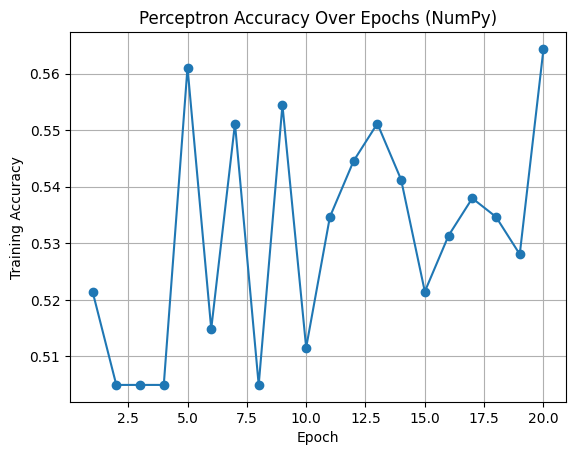

In [40]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(acc_list_np)+1), acc_list_np, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Perceptron Accuracy Over Epochs (NumPy)")
plt.grid(True)
plt.show()


In [58]:
def plot_decision_boundary(X, y, w, b, title="Decision Boundary", figsize=(8,6)):
    """
    Plots the 2D data and the linear decision boundary.
    X: input features, shape (n_samples, 2)
    y: binary labels (0 or 1)
    w: weight vector, shape (2,)
    b: bias scalar
    """
    plt.figure(figsize=figsize)

    # Scatter plot
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='green', label='Class 1')

    # Decision boundary: w1 * x1 + w2 * x2 + b = 0 → x2 = -(w1*x1 + b) / w2
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    if w[1] != 0:  # Avoid division by zero
        y_vals = -(w[0] * x_vals + b) / w[1]
        plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    else:
        plt.axvline(x=-b/w[0], color='k', linestyle='--', label='Vertical Boundary')

    plt.xlabel('Age')
    plt.ylabel('Cholesterol')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


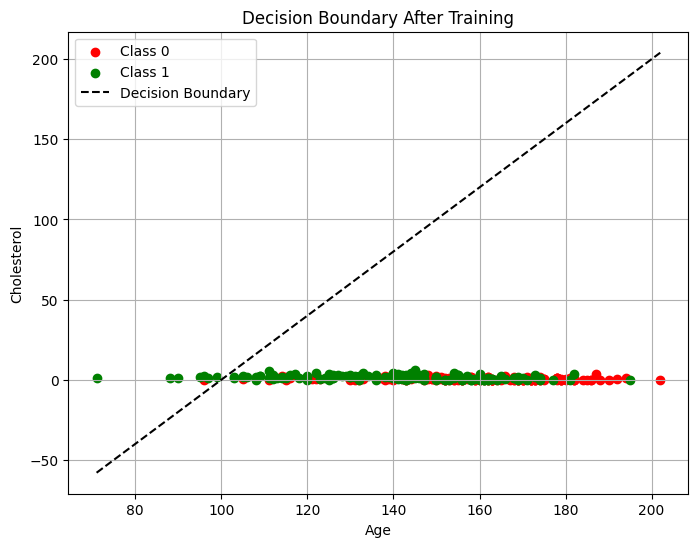

In [59]:
plot_decision_boundary(X_np, y_np, w_np, b_np, title="Decision Boundary After Training")


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_np)


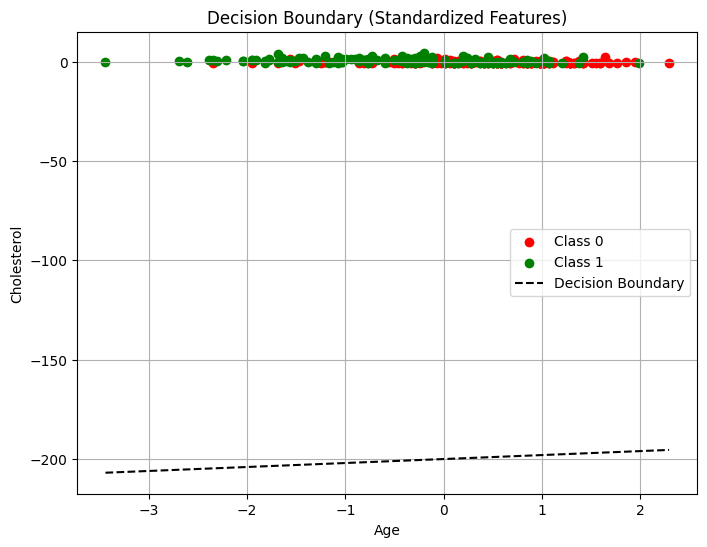

In [43]:
plot_decision_boundary(X_scaled, y_np, w_np, b_np, title="Decision Boundary (Standardized Features)")
